In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import xlrd
import warnings
warnings.filterwarnings('ignore')
import datetime
np.random.seed(42)

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("online_retail_II.xlsx" , sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [4]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [5]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [6]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [7]:
data = df1.append(df2)

In [8]:
print(data)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

In [9]:
import pandas as pd

# Load the transaction data from an Excel file
#data = pd.read_excel('transaction_data.xlsx')

# Convert the 'Invoice' column to string data type
data['Invoice'] = data['Invoice'].astype(str)

# Drop all rows with an 'Invoice' column starting with 'C' (indicating a cancellation)
data = data[~data['Invoice'].str.startswith('C')]


In [10]:
print(data)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

In [11]:
data.shape

(1047877, 8)

In [12]:
data.isnull().sum()/data.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.418179
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    23.118839
Country         0.000000
dtype: float64

In [13]:
#Dropping the rows where description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [14]:
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    237875
Country             0
dtype: int64

In [15]:
data[data["Customer ID"].isnull()]

Invoice StockCode                     Description  Quantity  \
263     489464     21733                    85123a mixed       -96   
283     489463     71477                           short      -240   
284     489467    85123A                     21733 mixed      -192   
577     489525    85226C       BLUE PULL BACK RACING CAR         1   
578     489525     85227     SET/6 3D KIT CARDS FOR KIDS         1   
...        ...       ...                             ...       ...   
541536  581498    85099B         JUMBO BAG RED RETROSPOT         5   
541537  581498    85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
541538  581498     85150   LADIES & GENTLEMEN METAL SIGN         1   
541539  581498     85174               S/4 CACTI CANDLES         1   
541540  581498       DOT                  DOTCOM POSTAGE         1   

               InvoiceDate    Price  Customer ID         Country  
263    2009-12-01 10:52:00     0.00          NaN  United Kingdom  
283    2009-12-01 10:52:00     0.00          NaN  United Kingdom  
284    2009-12-01 10:53:00     0.00          NaN  United Kingdom  
577    2009-12-01 11:49:00     0.55          NaN  United Kingdom  
578    2009-12-01 11:49:00     0.85          NaN  United Kingdom  
...                    ...      ...          ...             ...  
541536 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
541537 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
541538 2011-12-09 10:26:00     4.96          NaN  United Kingdom  
541539 2011-12-09 10:26:00    10.79          NaN  United Kingdom  
541540 2011-12-09 10:26:00  1714.17          NaN  United Kingdom  

[237875 rows x 8 columns]

In [16]:
data.iloc[575:, :]

Invoice StockCode                      Description  Quantity  \
609     489526     21844                   RETRO SPOT MUG         6   
610     489526     22073           RETRO SPOT STORAGE JAR         4   
611     489526     22072    TEA CUP AND SAUCER RETRO SPOT         4   
612     489526     22321         BIRD DECORATION RED SPOT        24   
613     489526   15056BL          EDWARDIAN PARASOL BLACK         6   
...        ...       ...                              ...       ...   
541905  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                          POSTAGE         1   

               InvoiceDate  Price  Customer ID  Country  
609    2009-12-01 11:50:00   2.95      12533.0  Germany  
610    2009-12-01 11:50:00   3.75      12533.0  Germany  
611    2009-12-01 11:50:00   3.75      12533.0  Germany  
612    2009-12-01 11:50:00   0.85      12533.0  Germany  
613    2009-12-01 11:50:00   5.95      12533.0  Germany  
...                    ...    ...          ...      ...  
541905 2011-12-09 12:50:00   2.10      12680.0   France  
541906 2011-12-09 12:50:00   4.15      12680.0   France  
541907 2011-12-09 12:50:00   4.15      12680.0   France  
541908 2011-12-09 12:50:00   4.95      12680.0   France  
541909 2011-12-09 12:50:00  18.00      12680.0   France  

[1042920 rows x 8 columns]

In [17]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value
data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)

In [18]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [19]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[805620 rows x 8 columns]

In [20]:

temp_df = pd.DataFrame(data["Country"].value_counts())

In [21]:
temp_df.head(10)

Country
United Kingdom   725296
Germany           16703
EIRE              15745
France            13813
Netherlands        5093
Spain              3720
Belgium            3069
Switzerland        3012
Portugal           2446
Australia          1815

In [22]:
names  = temp_df.index

In [23]:
px.scatter(temp_df, y = "Country", color = names, title = "Count of Countries")

In [24]:
#Checking total quantity by country
data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10)
#

Country
United Kingdom    8718823
Netherlands        384617
EIRE               321953
France             273675
Denmark            237925
Germany            228003
Australia          104398
Sweden              88512
Switzerland         52338
Spain               50807
Name: Quantity, dtype: int64

In [25]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(), 
           y = "Price", size = "Price", title = "Average Price by Country", opacity = 0.48)

In [26]:
countries = data["Country"].unique()

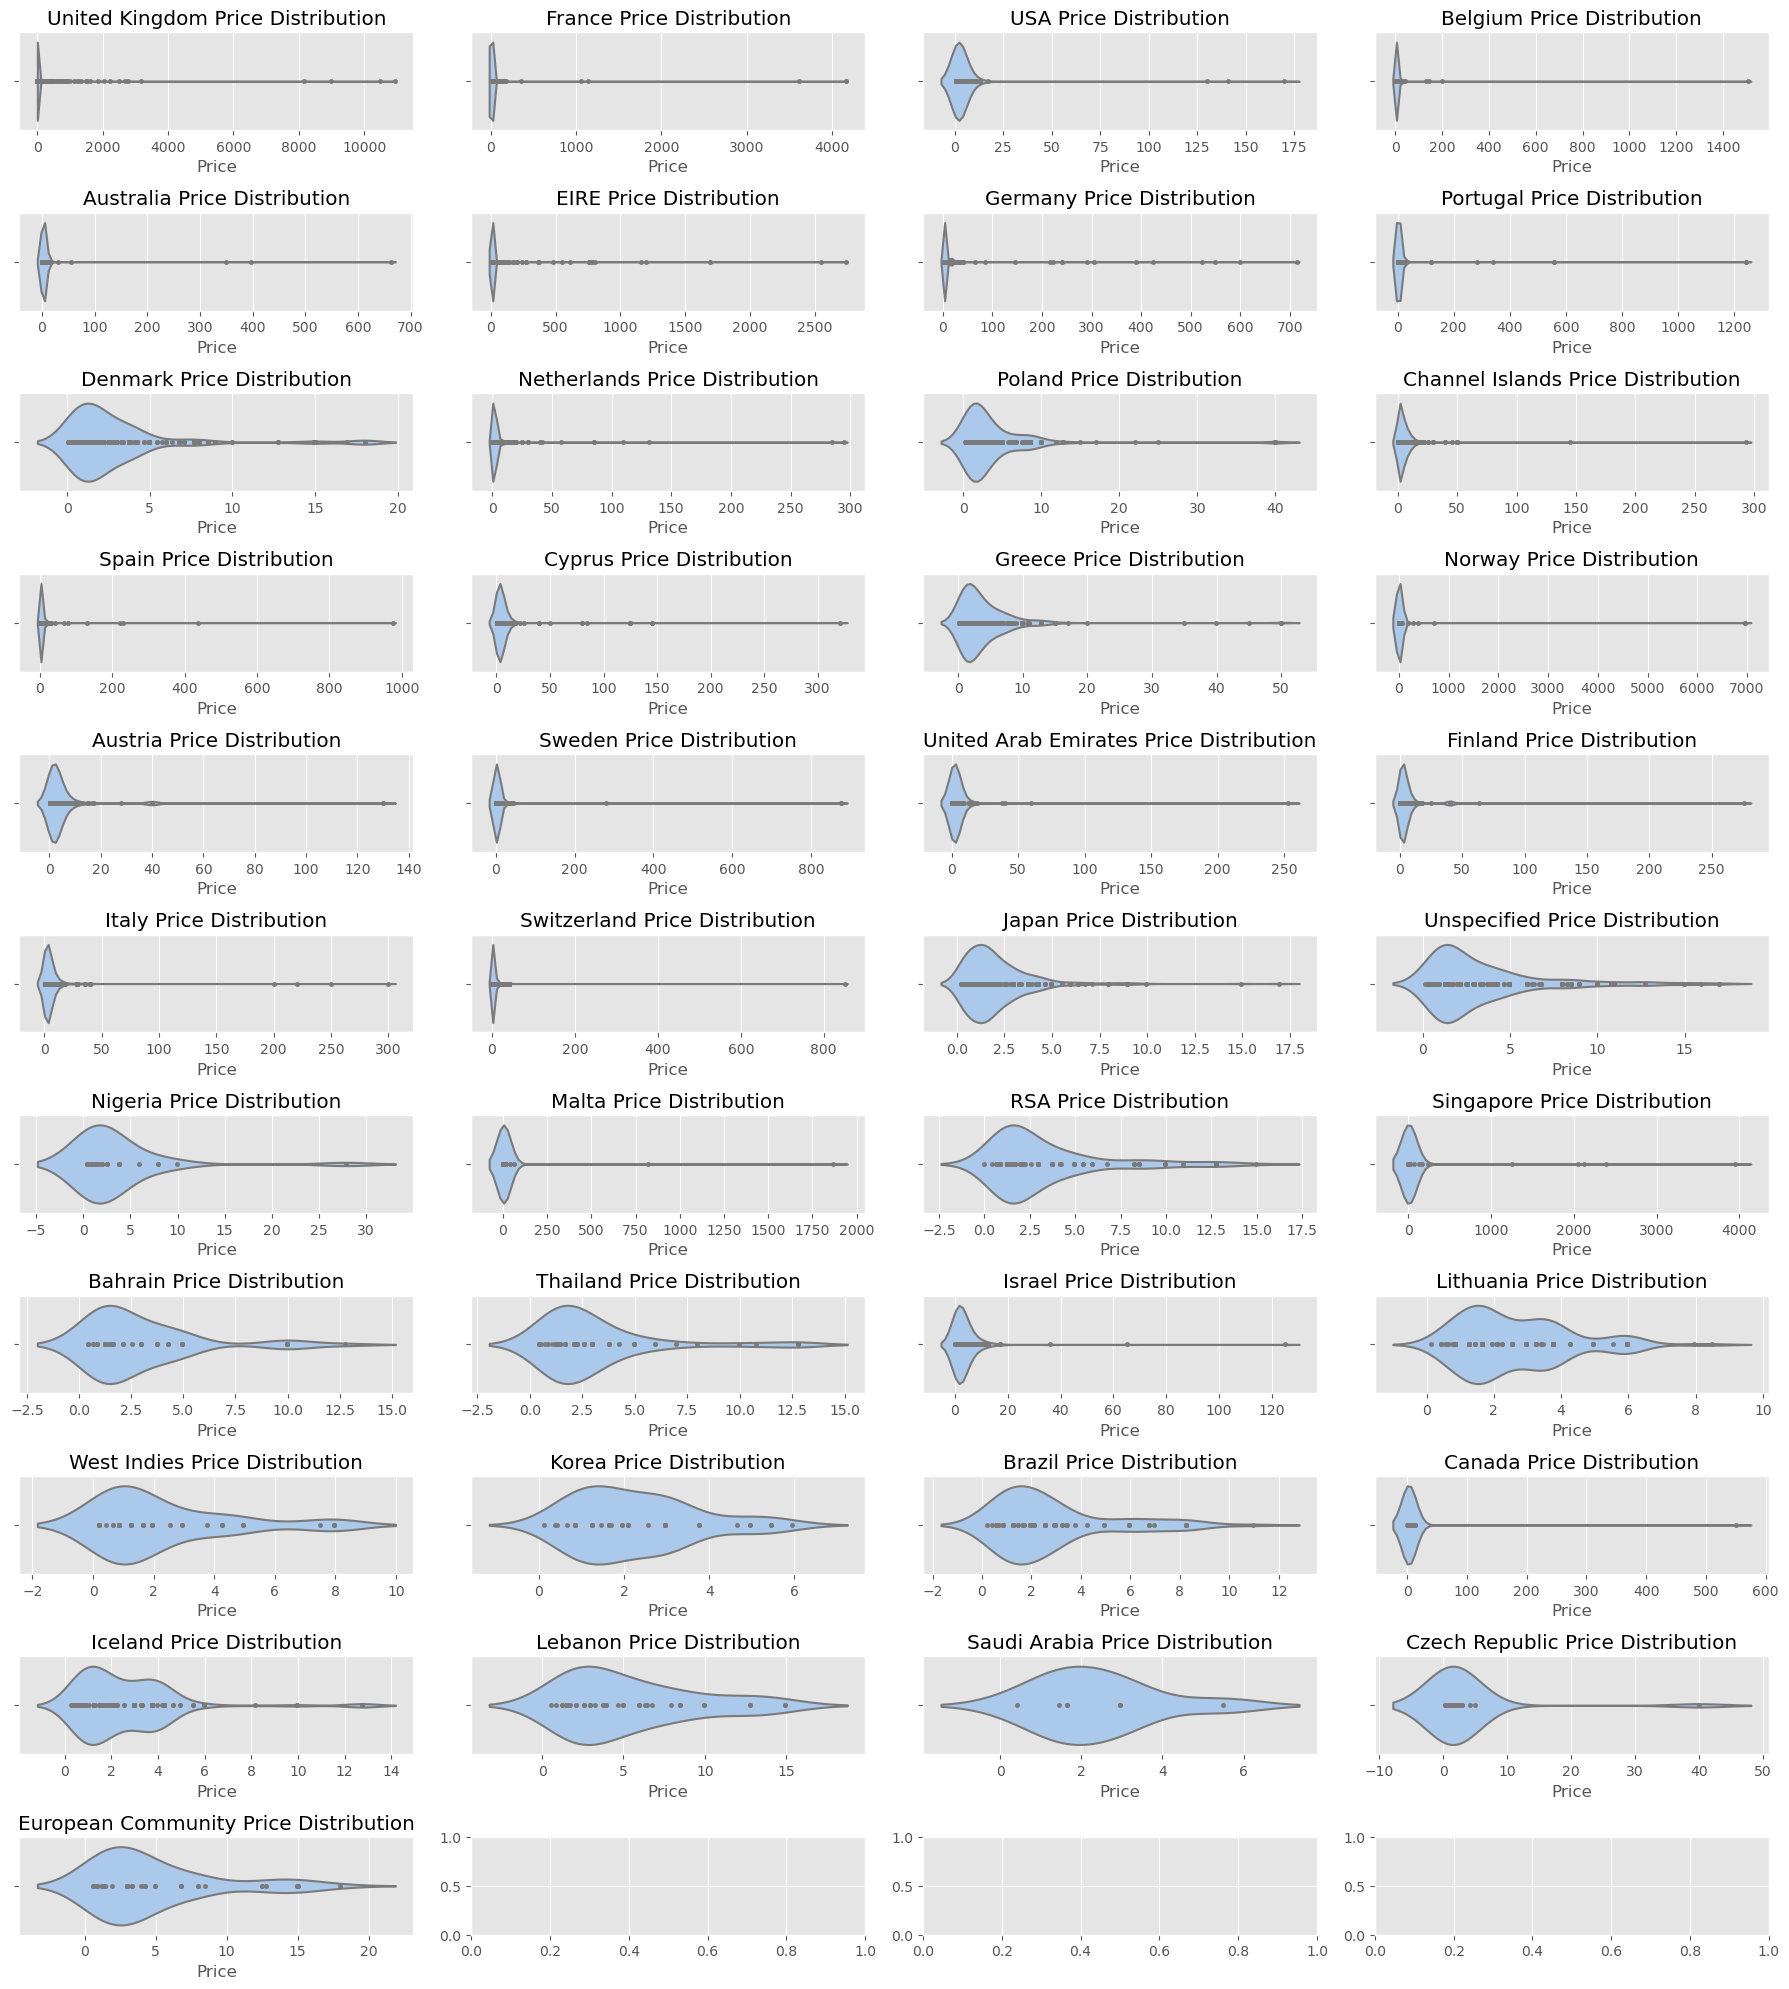

In [27]:
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

In [28]:
#Total number of unique invoices
len(data["Invoice"].unique())

36975

In [29]:
temp_invoice_df = data.groupby("Invoice").sum()

In [30]:
temp_invoice_df.reset_index(inplace = True)

In [31]:
#top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

In [32]:
data.groupby(["Invoice"]).mean().head(15).iloc[:, [1]].sort_values("Price", ascending = False)

Price
Invoice            
489444   141.000000
489447   130.000000
489434     4.081250
489436     3.730526
489437     3.628261
489439     3.560000
489440     3.150000
489446     3.118519
489441     3.042500
489448     2.970000
489435     2.625000
489438     2.591176
489445     2.477895
489443     2.370000
489442     2.040870

In [33]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [34]:
#Now look at the data once again & see what else insights we can get from the data itself
data.head(15)

Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5   489434     22064           PINK DOUGHNUT TRINKET POT         24   
6   489434     21871                  SAVE THE PLANET MUG        24   
7   489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8   489435     22350                            CAT BOWL         12   
9   489435     22349       DOG BOWL , CHASING BALL DESIGN        12   
10  489435     22195         HEART MEASURING SPOONS LARGE        24   
11  489435     22353   LUNCHBOX WITH CUTLERY FAIRY CAKES         12   
12  489436    48173C                DOOR MAT BLACK FLOCK         10   
13  489436     21755             LOVE BUILDING BLOCK WORD        18   
14  489436     21754             HOME BUILDING BLOCK WORD         3   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5  2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7  2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8  2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9  2009-12-01 07:46:00   3.75      13085.0  United Kingdom  
10 2009-12-01 07:46:00   1.65      13085.0  United Kingdom  
11 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
12 2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
13 2009-12-01 09:06:00   5.45      13078.0  United Kingdom  
14 2009-12-01 09:06:00   5.95      13078.0  United Kingdom

<AxesSubplot: xlabel='Description'>

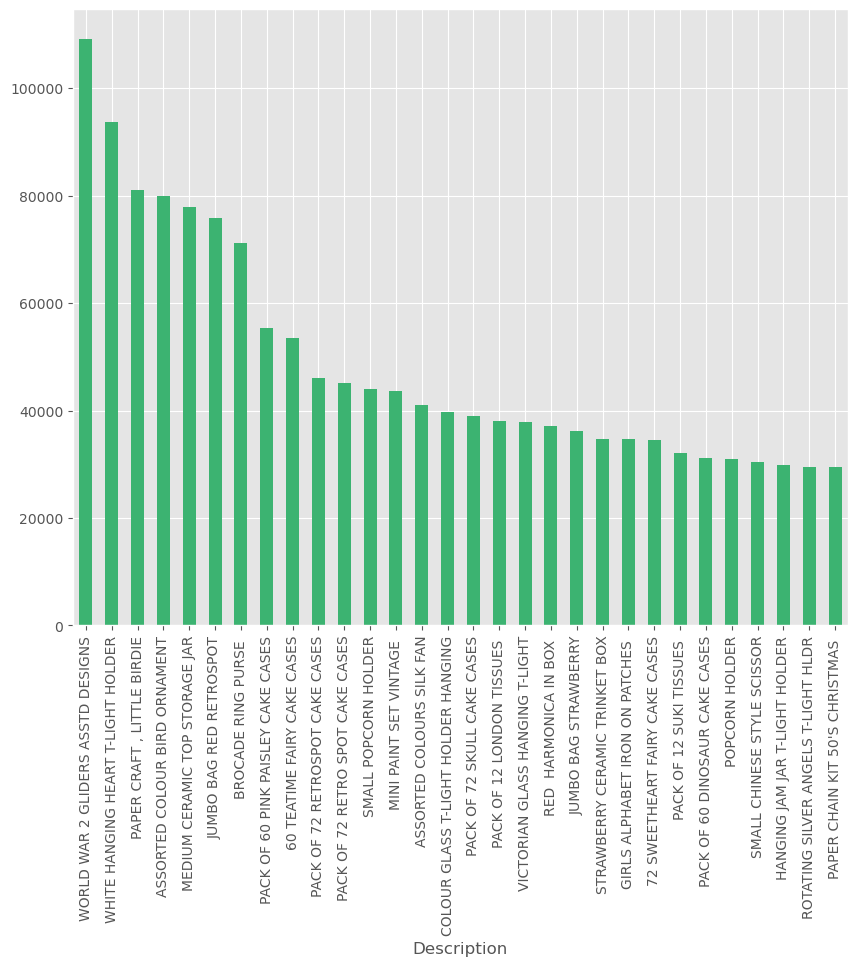

In [35]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
data.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(30)["Quantity"].plot(kind = "bar", color = 'mediumseagreen')

In [36]:
temp_data = data.copy()

In [37]:
temp_data.head(5)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [38]:
## Conducting Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [39]:
#Now Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [40]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping) 

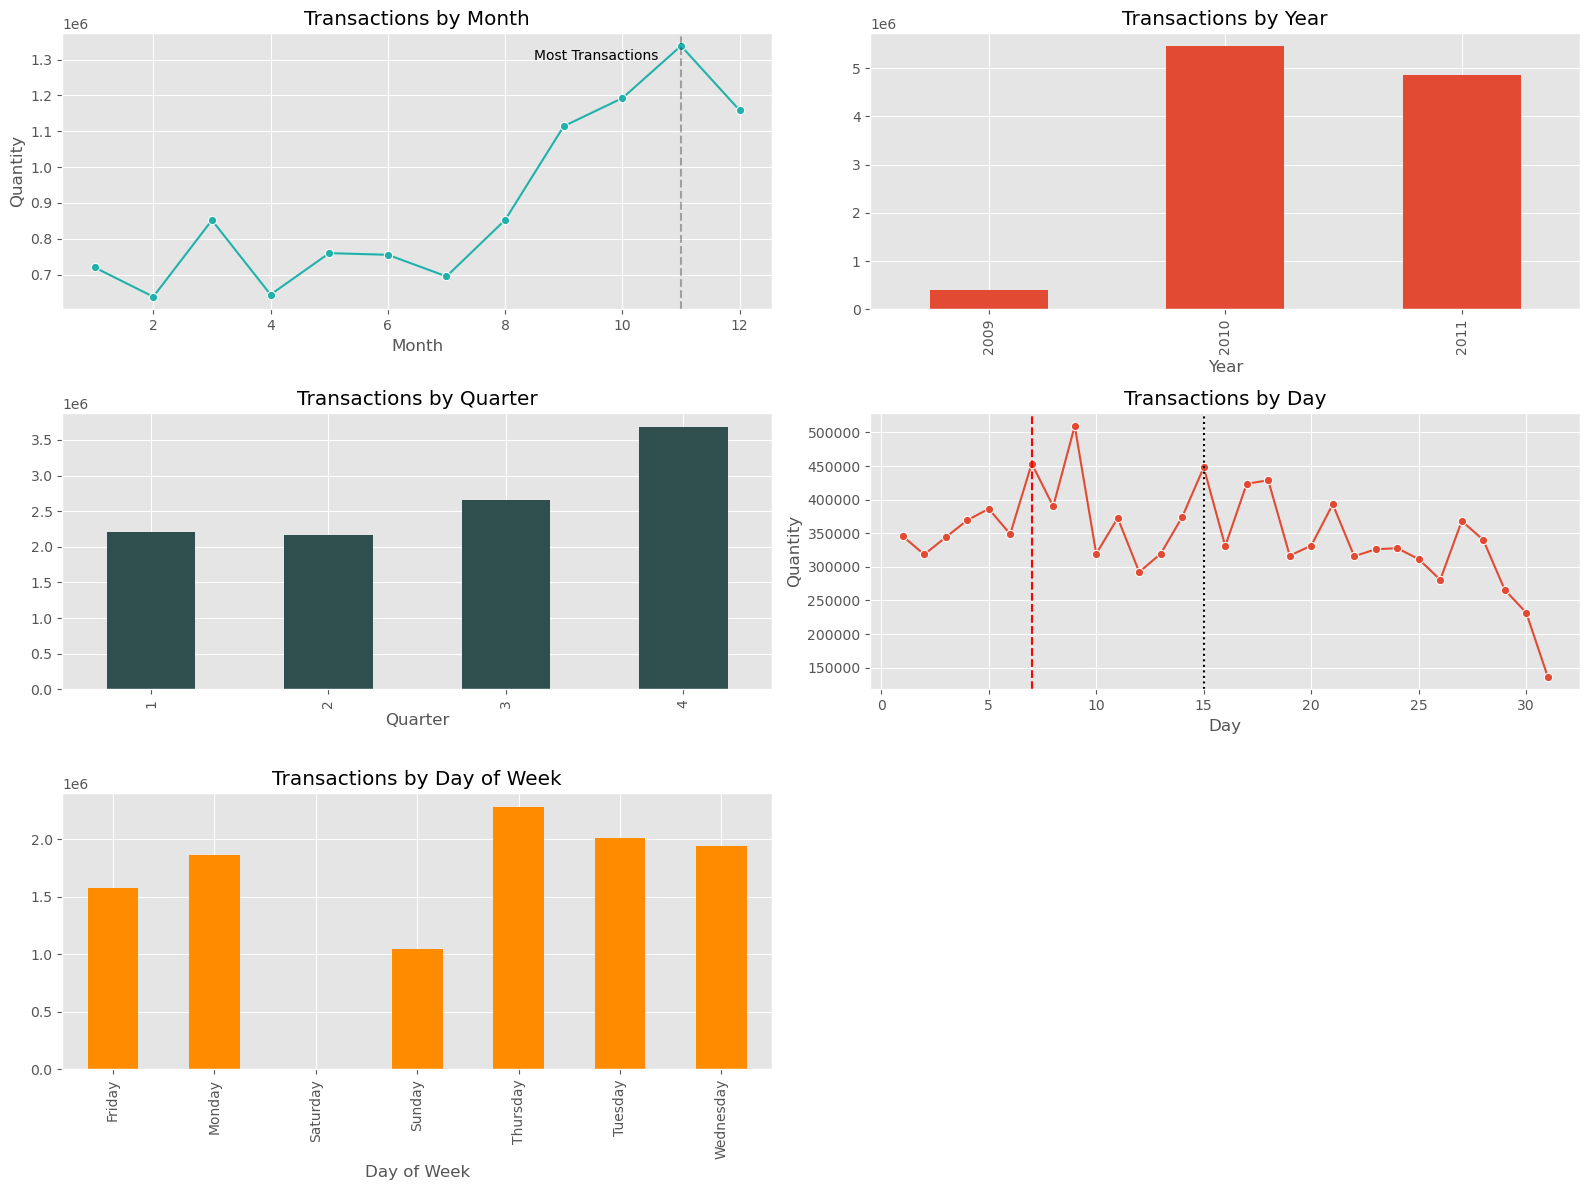

In [41]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = temp_data.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
temp_data.groupby("Year").sum()["Quantity"].plot(kind = "bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day").sum("Quantity"), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(3,2,5)
temp_data.groupby("Day of Week").sum()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

In [42]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 22
Total Number of Transactions in 2009: 400201
--------------------------------------------
Total Number of Countries in 2009: 37
Total Number of Transactions in 2009: 5451303
--------------------------------------------
Total Number of Countries in 2009: 36
Total Number of Transactions in 2009: 4869417


In [43]:

_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [44]:
no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [45]:
temp = data.groupby(["Country", "Description"]).sum()["Quantity"]

In [46]:
temp = pd.DataFrame(temp)

In [47]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

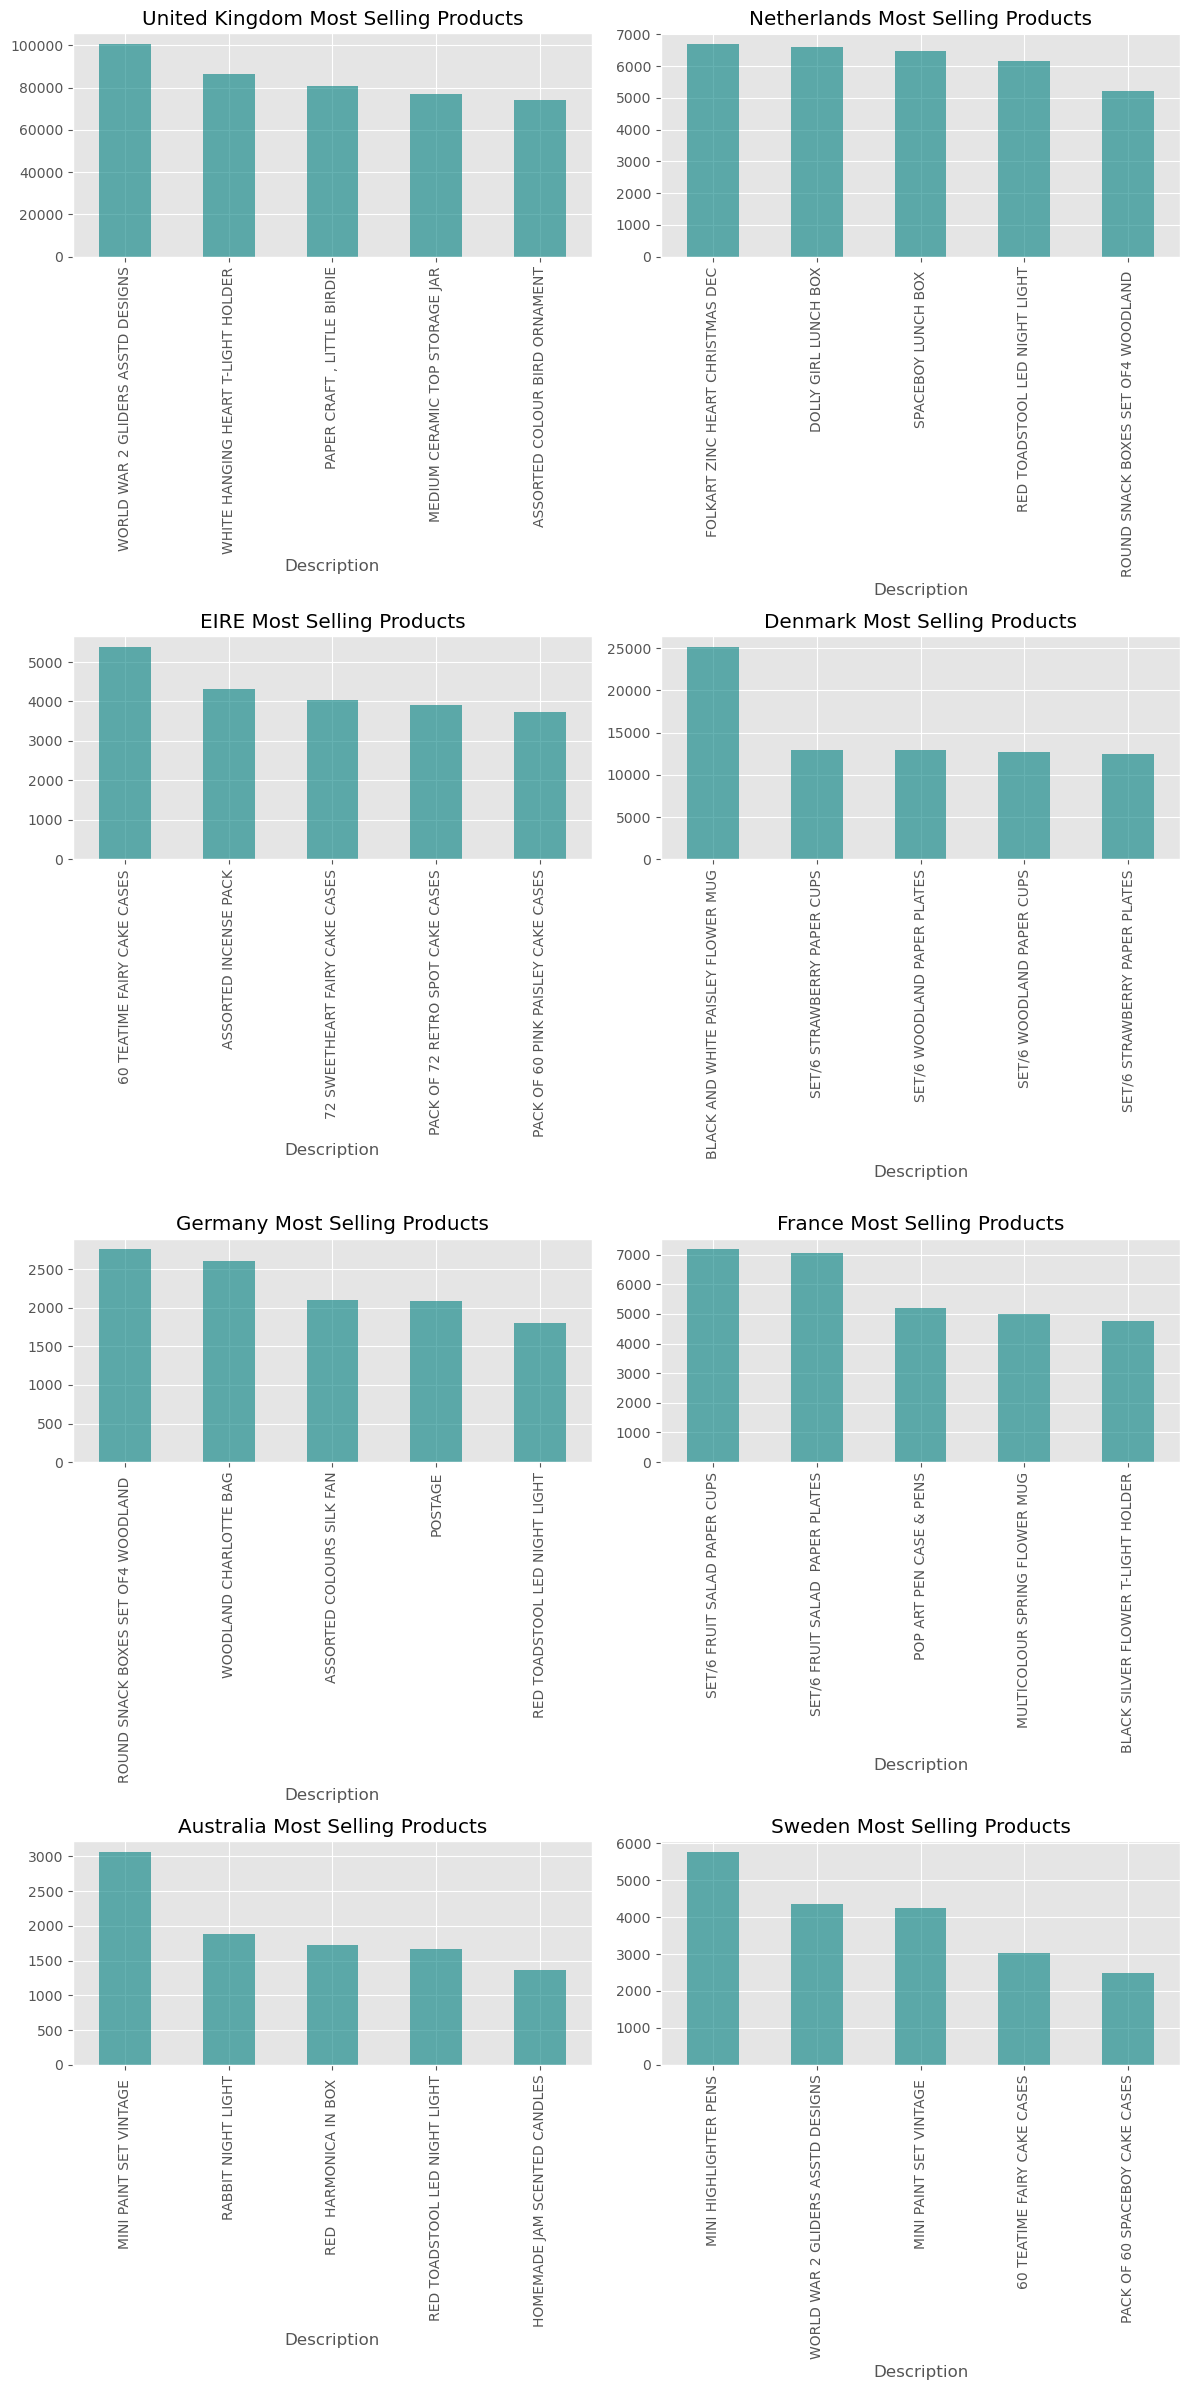

In [48]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

In [49]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]

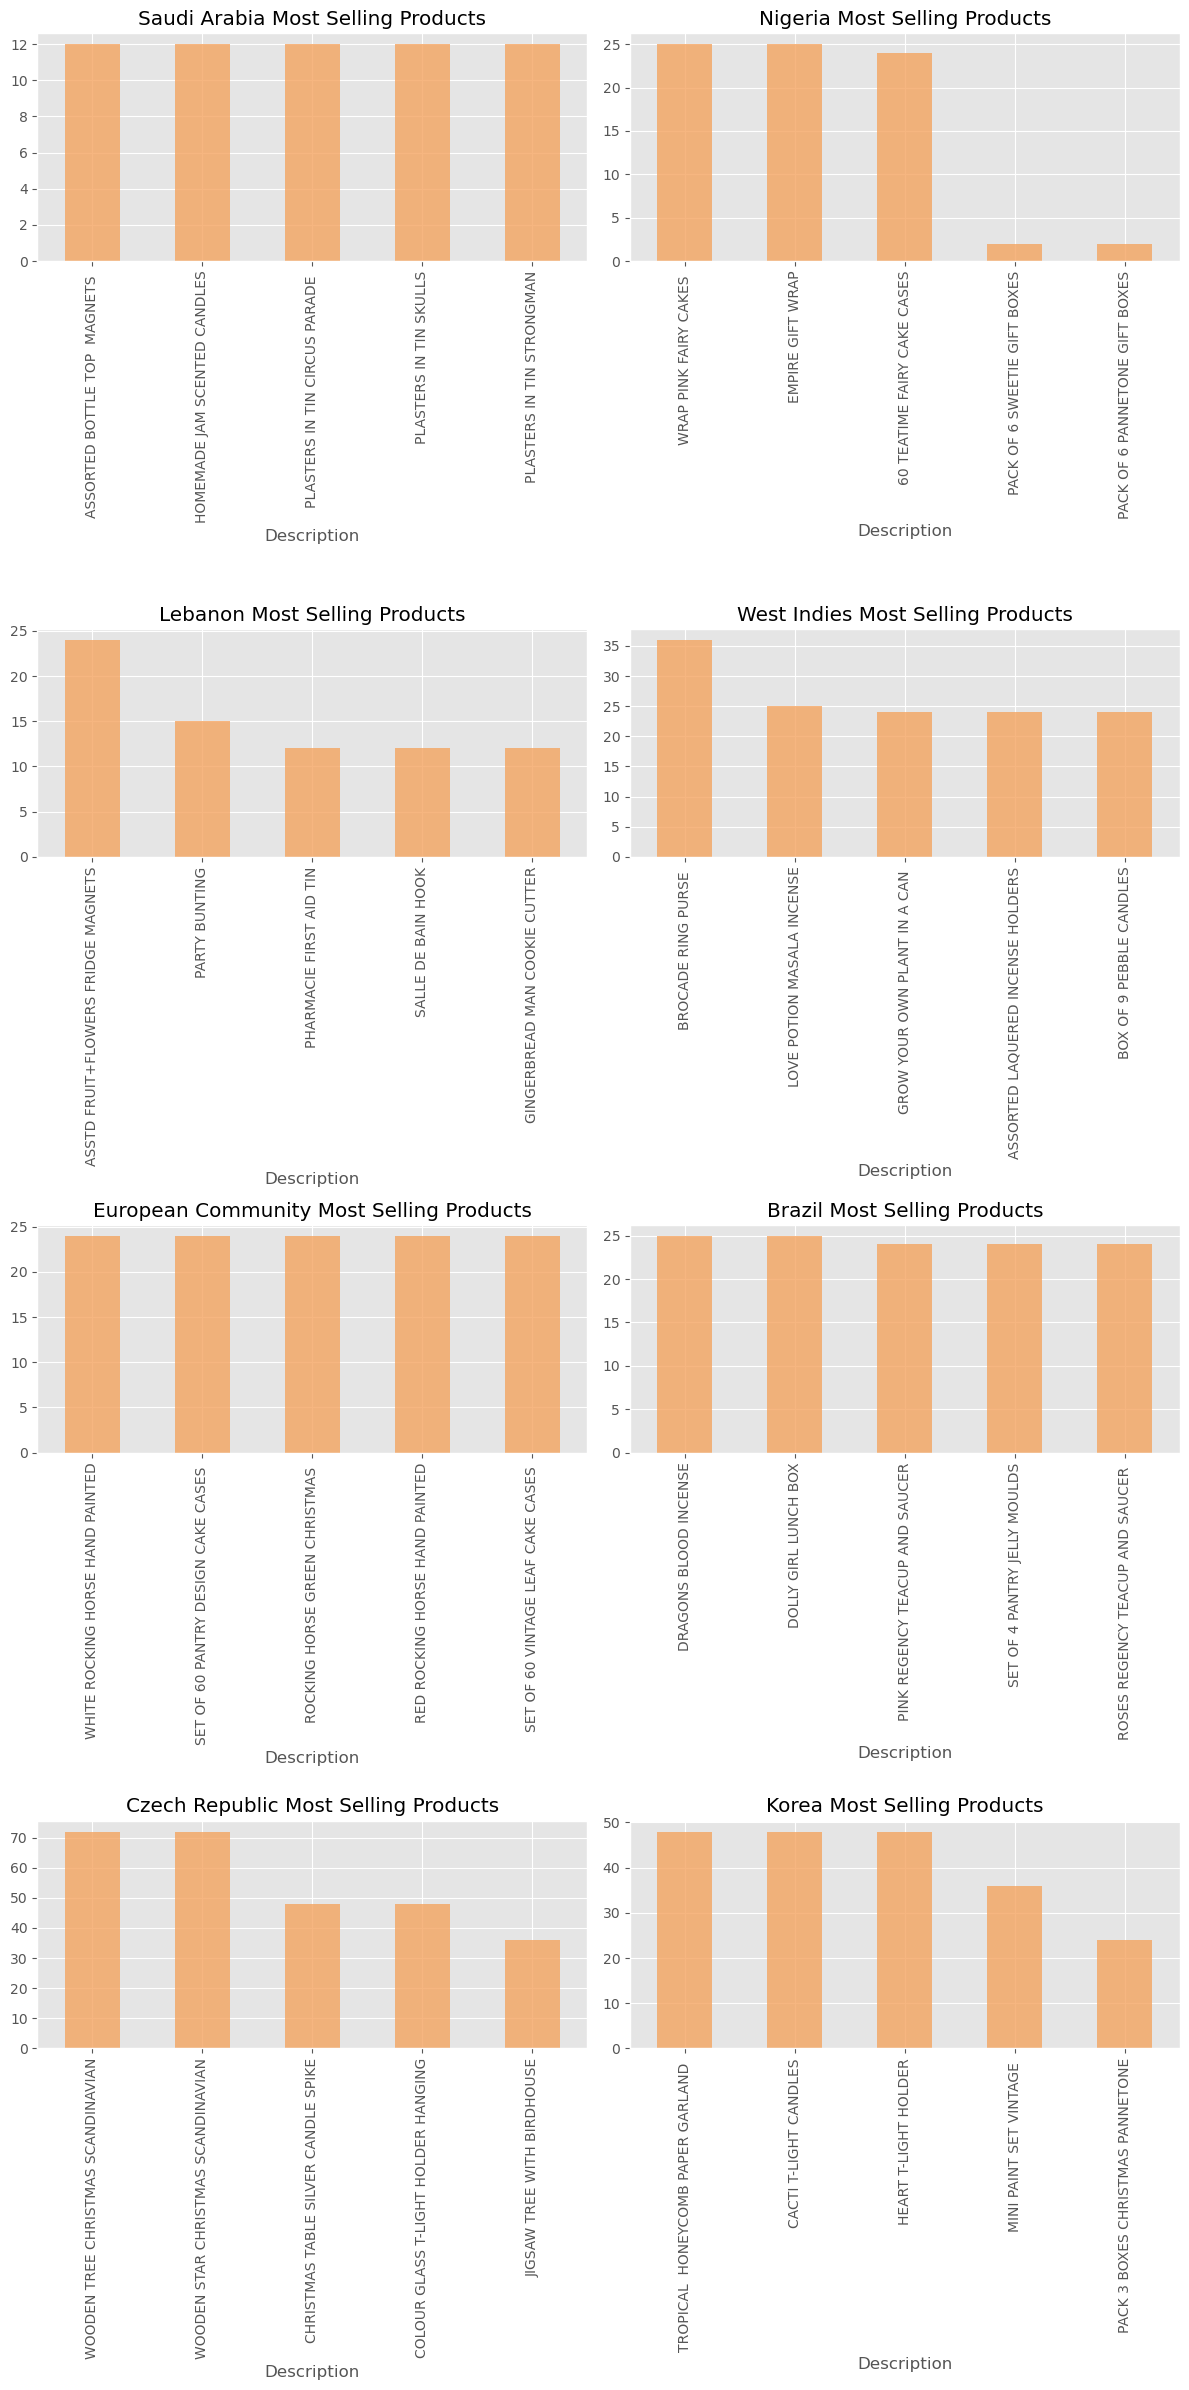

In [50]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)
    
    plt.tight_layout()

In [51]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [52]:
data["Total Amount"] = data["Quantity"]*data["Price"]

In [53]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  Total Amount  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom         83.40  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom         81.00  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom         81.00  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom        100.80  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom         30.00  
...                    ...    ...          ...             ...           ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France         12.60  
541906 2011-12-09 12:50:00   4.15      12680.0          France         16.60  
541907 2011-12-09 12:50:00   4.15      12680.0          France         16.60  
541908 2011-12-09 12:50:00   4.95      12680.0          France         14.85  
541909 2011-12-09 12:50:00  18.00      12680.0          France         18.00  

[805620 rows x 9 columns]

In [54]:
data.isnull().sum()

Invoice         0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
Price           0
Customer ID     0
Country         0
Total Amount    0
dtype: int64

In [55]:
import lifetimes

In [56]:
rfm_summary = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total Amount")
#The shorter the recency value, the more recently the customer made a purchase, and thus the higher the recency score.

In [57]:
rfm_summary.head()

frequency  recency      T  monetary_value
Customer ID                                           
12346.0            7.0    400.0  725.0    11066.637143
12347.0            7.0    402.0  404.0      717.398571
12348.0            4.0    363.0  438.0      449.310000
12349.0            3.0    571.0  589.0     1120.056667
12350.0            0.0      0.0  310.0        0.000000

In [58]:
print(rfm_summary)

             frequency  recency      T  monetary_value
Customer ID                                           
12346.0            7.0    400.0  725.0    11066.637143
12347.0            7.0    402.0  404.0      717.398571
12348.0            4.0    363.0  438.0      449.310000
12349.0            3.0    571.0  589.0     1120.056667
12350.0            0.0      0.0  310.0        0.000000
...                ...      ...    ...             ...
18283.0           18.0    655.0  658.0      146.405556
18284.0            0.0      0.0  431.0        0.000000
18285.0            0.0      0.0  660.0        0.000000
18286.0            1.0    247.0  723.0      833.480000
18287.0            5.0    529.0  571.0      622.276000

[5881 rows x 4 columns]


In [59]:
rfm_summary.reset_index(inplace = True)

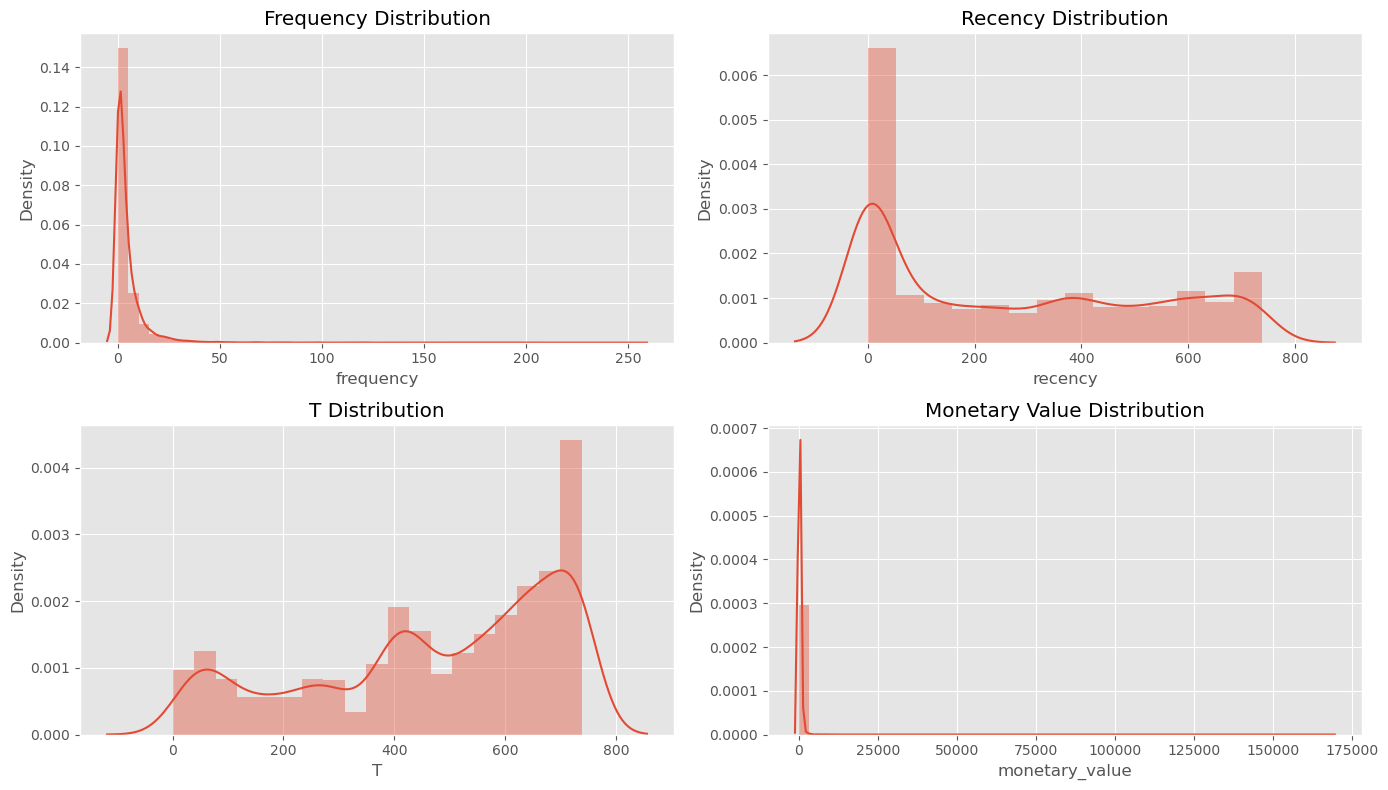

In [60]:
#Now we plot the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(rfm_summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(rfm_summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(rfm_summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(rfm_summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

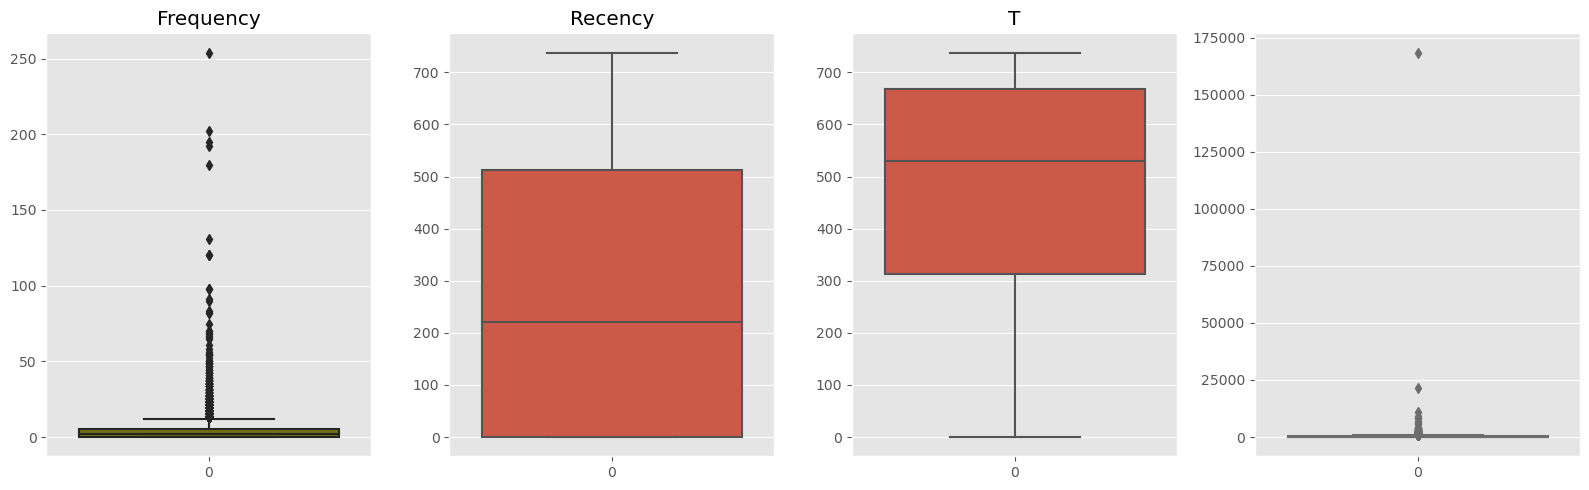

In [61]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(rfm_summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(rfm_summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(rfm_summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(rfm_summary["monetary_value"], color = "salmon")

plt.tight_layout()

In [62]:
rfm_summary.describe(percentiles = [0.01,0.1,0.25,0.50,0.75,0.90,0.99])

Customer ID    frequency      recency            T  monetary_value
count   5881.000000  5881.000000  5881.000000  5881.000000     5881.000000
mean   15314.674205     4.630335   273.254208   474.247067      318.883972
std     1715.429759    10.001176   258.971689   223.142456     2256.282323
min    12346.000000     0.000000     0.000000     0.000000        0.000000
1%     12405.800000     0.000000     0.000000    15.000000        0.000000
10%    12937.000000     0.000000     0.000000    89.000000        0.000000
25%    13833.000000     0.000000     0.000000   313.000000        0.000000
50%    15313.000000     2.000000   220.000000   530.000000      213.470200
75%    16797.000000     5.000000   512.000000   668.000000      376.086667
90%    17696.000000    11.000000   667.000000   730.000000      604.858000
99%    18228.200000    38.000000   732.000000   738.000000     1811.251000
max    18287.000000   254.000000   738.000000   738.000000   168469.600000

In [63]:
from lifetimes.plotting import *
from lifetimes.utils import *
#importing the necessary packages

In [64]:
data = summary_data_from_transaction_data(data, 'Customer ID', 'InvoiceDate', monetary_value_col='Total Amount', observation_period_end='2011-12-9')
data.reset_index().head()

Customer ID  frequency  recency      T  monetary_value
0      12346.0        7.0    400.0  725.0    11066.637143
1      12347.0        7.0    402.0  404.0      717.398571
2      12348.0        4.0    363.0  438.0      449.310000
3      12349.0        3.0    571.0  589.0     1120.056667
4      12350.0        0.0      0.0  310.0        0.000000

In [65]:
print(data['frequency'].describe())

count    5881.000000
mean        4.630335
std        10.001176
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max       254.000000
Name: frequency, dtype: float64


In [66]:
#Percentage of customers purchase the item only once
one_time_buyers = round(sum(data['frequency'] == 0)/float(len(data))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

Percentage of customers purchase the item only once: 28.77 %


<AxesSubplot: ylabel='Frequency'>

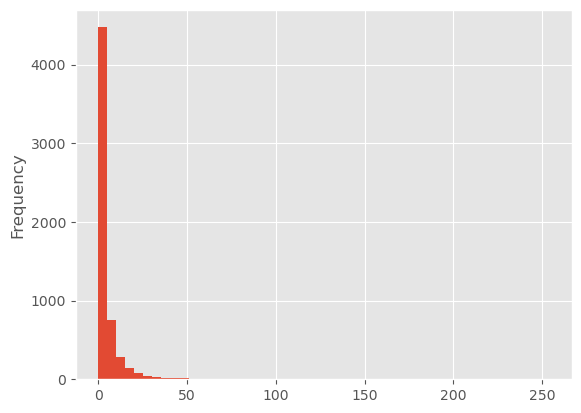

In [67]:
#Create histogram to find out how many customers purchased item only once.
data['frequency'].plot(kind='hist', bins=50)

In [68]:
#Frequency/Recency Analysis Using the BG/NBD Model
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data['frequency'], data['recency'], data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 5881 subjects, a: 0.11, alpha: 63.18, b: 2.42, r: 0.66>


<AxesSubplot: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

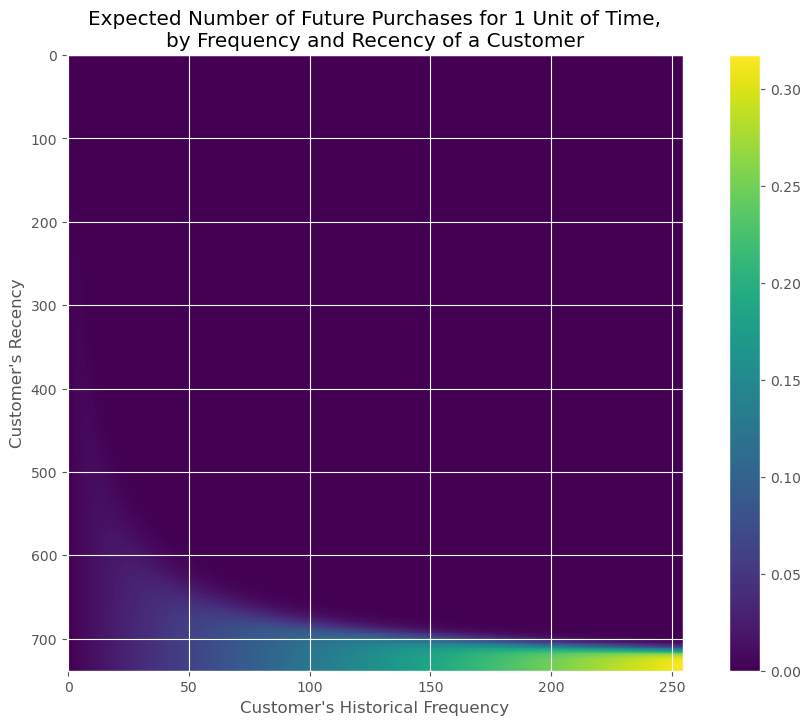

In [69]:
#Visualizing our frequency/recency matrix
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

<AxesSubplot: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

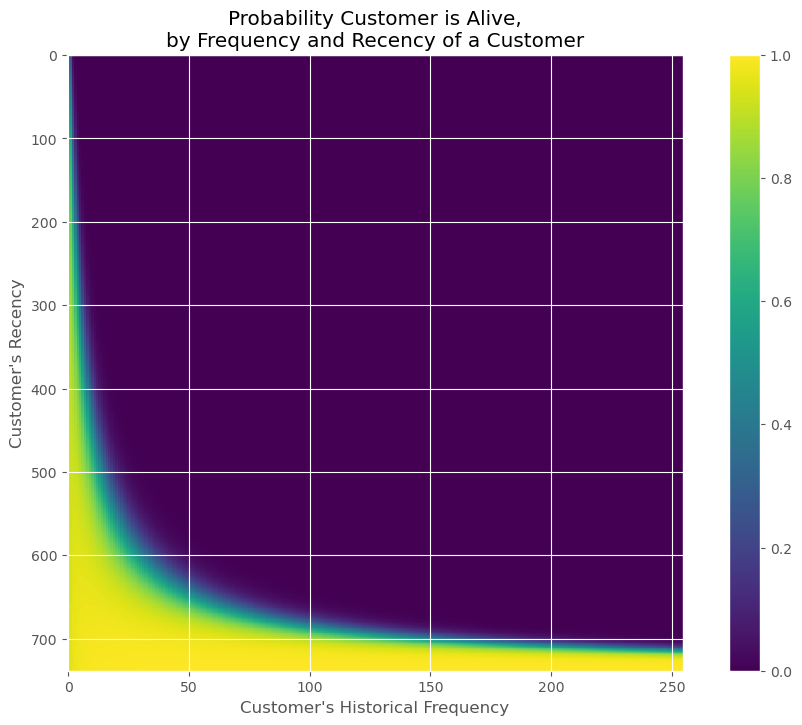

In [70]:
#predict if the customers are surely alive:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [71]:
#Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 365 days, based on historical data

t = 365
data['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], data['recency'], data['T']),2)
data.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

Customer ID  frequency  recency      T  monetary_value  pred_num_txn
0      14911.0      254.0    737.0  738.0     1162.358268        113.48
1      12748.0      202.0    735.0  735.0      279.101436         90.65
2      15311.0      195.0    738.0  738.0      594.605846         87.19
3      17841.0      192.0    736.0  737.0      366.423490         85.95
4      14606.0      180.0    735.0  736.0      170.255889         80.69
5      13089.0      131.0    735.0  737.0      888.318779         58.71
6      14527.0      120.0    735.0  737.0      223.904250         53.80
7      14156.0      120.0    729.0  738.0     2607.329750         53.62
8      12971.0       98.0    721.0  724.0      162.360612         44.69
9      13798.0       98.0    730.0  731.0      768.906837         44.32

In [72]:
data

frequency  recency      T  monetary_value  pred_num_txn
Customer ID                                                         
12346.0            7.0    400.0  725.0    11066.637143          1.98
12347.0            7.0    402.0  404.0      717.398571          5.72
12348.0            4.0    363.0  438.0      449.310000          3.16
12349.0            3.0    571.0  589.0     1120.056667          1.95
12350.0            0.0      0.0  310.0        0.000000          0.63
...                ...      ...    ...             ...           ...
18283.0           18.0    655.0  658.0      146.405556          9.18
18284.0            0.0      0.0  431.0        0.000000          0.48
18285.0            0.0      0.0  660.0        0.000000          0.33
18286.0            1.0    247.0  723.0      833.480000          0.63
18287.0            5.0    529.0  571.0      622.276000          3.11

[5881 rows x 5 columns]

<AxesSubplot: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

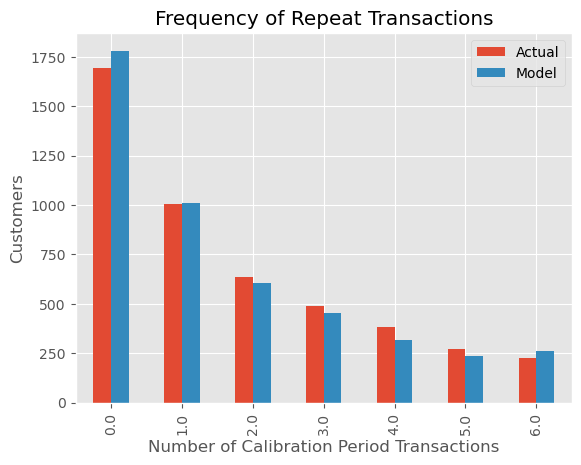

In [73]:
#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [74]:
#Customer's future transaction prediction for next 365 days
#This information can be used to inform retention and marketing strategies, such as 
#identifying customers who are predicted to have a high probability of making
#additional purchases and targeting them with personalized offers to increase the likelihood of future transactions.
t = 365
individual = data.loc[14911]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

113.47992069336819

In [75]:
#OBSERVATION: Our model predicts that customer 14911’s future transaction is appx 113 in 365 days

In [76]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation by pearson coeff.
data[['monetary_value', 'frequency']].corr()

monetary_value  frequency
monetary_value         1.00000    0.04854
frequency              0.04854    1.00000

When fitting the gamma gamma model, we need to be careful with two conditions:

We must remove users without repeated purchases.
The Gamma-Gamma model assumes that there is no relationship between the monetary value and the purchase frequency.

In [77]:
#Shortlist customers who had at least one repeat purchase with the company. 
shortlisted_customers = data[data['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

   Customer ID  frequency  recency      T  monetary_value  pred_num_txn
0      12346.0        7.0    400.0  725.0    11066.637143          1.98
1      12347.0        7.0    402.0  404.0      717.398571          5.72
2      12348.0        4.0    363.0  438.0      449.310000          3.16
3      12349.0        3.0    571.0  589.0     1120.056667          1.95
4      12352.0        8.0    356.0  392.0      338.261250          6.57
-----------------------------------------
The Number of Returning Customers are:  4189


In [78]:
print(shortlisted_customers.columns)


Index(['frequency', 'recency', 'T', 'monetary_value', 'pred_num_txn'], dtype='object')


In [79]:
#Train gamma-gamma model by taking into account the monetary_value.
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],
        shortlisted_customers['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 4189 subjects, p: 2.13, q: 3.53, v: 486.53>


At this point we can train our Gamma-Gamma submodel and predict the conditional, expected average lifetime value of our customers.

In [80]:
#After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 
print(ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']
    ).head(10))

Customer ID
12346.0    9520.529482
12347.0     672.740683
12348.0     440.212758
12349.0     918.531323
12350.0     409.579325
12351.0     409.579325
12352.0     347.481829
12353.0     263.054511
12354.0     409.579325
12355.0     432.350492
dtype: float64


In [81]:
#We can now estimate the average profit of each of these customers
data['pred_txn_value'] = round(ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']), 2)
data.reset_index().head()

Customer ID  frequency  recency      T  monetary_value  pred_num_txn  \
0      12346.0        7.0    400.0  725.0    11066.637143          1.98   
1      12347.0        7.0    402.0  404.0      717.398571          5.72   
2      12348.0        4.0    363.0  438.0      449.310000          3.16   
3      12349.0        3.0    571.0  589.0     1120.056667          1.95   
4      12350.0        0.0      0.0  310.0        0.000000          0.63   

   pred_txn_value  
0         9520.53  
1          672.74  
2          440.21  
3          918.53  
4          409.58

In [82]:
data.isnull().sum()

frequency         0
recency           0
T                 0
monetary_value    0
pred_num_txn      0
pred_txn_value    0
dtype: int64

In [83]:
#Here we calculate CLV for top customer
data['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    data['frequency'],
    data['recency'],
    data['T'],
    data['monetary_value'],
    time=120, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
), 2)


data.sort_values(by='CLV', ascending=False).head(10).reset_index()

Customer ID  frequency  recency      T  monetary_value  pred_num_txn  \
0      18102.0       66.0    738.0  738.0     9189.930455         29.68   
1      14646.0       90.0    736.0  737.0     5809.905333         40.42   
2      16446.0        1.0    205.0  205.0   168469.600000          2.08   
3      17450.0       30.0    430.0  438.0     6924.523000         21.52   
4      14156.0      120.0    729.0  738.0     2607.329750         53.62   
5      14911.0      254.0    737.0  738.0     1162.358268        113.48   
6      14096.0       16.0     97.0  101.0     4071.434375         34.13   
7      13694.0       82.0    732.0  735.0     2365.279512         36.93   
8      12415.0       22.0    503.0  527.0     6460.528636         13.48   
9      17511.0       50.0    735.0  737.0     3449.898200         22.57   

   pred_txn_value         CLV  
0         9034.69  1421973.87  
1         5739.56  1230122.87  
2        77223.53   823480.95  
3         6676.38   747542.80  
4         2585.79   735019.35  
5         1158.85   697097.95  
6         3818.36   648824.42  
7         2337.35   457643.47  
8         6150.55   434547.89  
9         3379.34   404470.04

In [84]:
data.isnull().sum()

frequency         0
recency           0
T                 0
monetary_value    0
pred_num_txn      0
pred_txn_value    0
CLV               0
dtype: int64

In [85]:
data["profit_margin"] = data["CLV"]*0.05

In [86]:
data.head()

frequency  recency      T  monetary_value  pred_num_txn  \
Customer ID                                                            
12346.0            7.0    400.0  725.0    11066.637143          1.98   
12347.0            7.0    402.0  404.0      717.398571          5.72   
12348.0            4.0    363.0  438.0      449.310000          3.16   
12349.0            3.0    571.0  589.0     1120.056667          1.95   
12350.0            0.0      0.0  310.0        0.000000          0.63   

             pred_txn_value        CLV  profit_margin  
Customer ID                                            
12346.0             9520.53  100128.47      5006.4235  
12347.0              672.74   20043.49      1002.1745  
12348.0              440.21    7289.29       364.4645  
12349.0              918.53    9493.55       474.6775  
12350.0              409.58    1353.96        67.6980

In [87]:
data

frequency  recency      T  monetary_value  pred_num_txn  \
Customer ID                                                            
12346.0            7.0    400.0  725.0    11066.637143          1.98   
12347.0            7.0    402.0  404.0      717.398571          5.72   
12348.0            4.0    363.0  438.0      449.310000          3.16   
12349.0            3.0    571.0  589.0     1120.056667          1.95   
12350.0            0.0      0.0  310.0        0.000000          0.63   
...                ...      ...    ...             ...           ...   
18283.0           18.0    655.0  658.0      146.405556          9.18   
18284.0            0.0      0.0  431.0        0.000000          0.48   
18285.0            0.0      0.0  660.0        0.000000          0.33   
18286.0            1.0    247.0  723.0      833.480000          0.63   
18287.0            5.0    529.0  571.0      622.276000          3.11   

             pred_txn_value        CLV  profit_margin  
Customer ID                                            
12346.0             9520.53  100128.47      5006.4235  
12347.0              672.74   20043.49      1002.1745  
12348.0              440.21    7289.29       364.4645  
12349.0              918.53    9493.55       474.6775  
12350.0              409.58    1353.96        67.6980  
...                     ...        ...            ...  
18283.0              162.70    7893.90       394.6950  
18284.0              409.58    1040.01        52.0005  
18285.0              409.58     725.43        36.2715  
18286.0              603.33    2027.74       101.3870  
18287.0              581.44    9528.84       476.4420  

[5881 rows x 8 columns]

In [88]:
data.isnull().sum()

frequency         0
recency           0
T                 0
monetary_value    0
pred_num_txn      0
pred_txn_value    0
CLV               0
profit_margin     0
dtype: int64

In [89]:
col = ["monetary_value", "pred_txn_value", "CLV", "profit_margin"]

In [90]:
new_df = data[col]

In [91]:
new_df

monetary_value  pred_txn_value        CLV  profit_margin
Customer ID                                                          
12346.0        11066.637143         9520.53  100128.47      5006.4235
12347.0          717.398571          672.74   20043.49      1002.1745
12348.0          449.310000          440.21    7289.29       364.4645
12349.0         1120.056667          918.53    9493.55       474.6775
12350.0            0.000000          409.58    1353.96        67.6980
...                     ...             ...        ...            ...
18283.0          146.405556          162.70    7893.90       394.6950
18284.0            0.000000          409.58    1040.01        52.0005
18285.0            0.000000          409.58     725.43        36.2715
18286.0          833.480000          603.33    2027.74       101.3870
18287.0          622.276000          581.44    9528.84       476.4420

[5881 rows x 4 columns]

In [92]:
from sklearn.cluster import KMeans

inertia = []

for i in range(2, 11):
    cluster = KMeans(n_clusters = i, init = "k-means++").fit(new_df)
    inertia.append(cluster.inertia_)
     

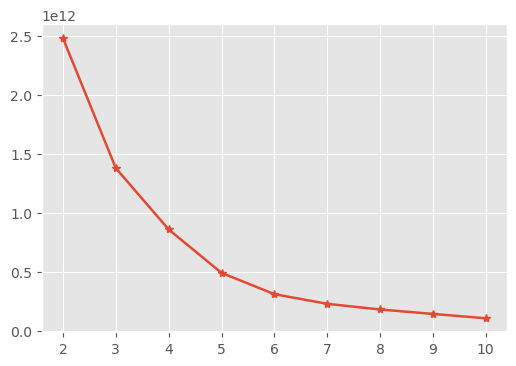

In [93]:
plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia, marker = "*", linewidth = 1.8)

In [94]:
k_model = KMeans(n_clusters=5, init='k-means++', max_iter=1000)

In [95]:
k_model_fit = k_model.fit(new_df)

In [96]:
new_df

monetary_value  pred_txn_value        CLV  profit_margin
Customer ID                                                          
12346.0        11066.637143         9520.53  100128.47      5006.4235
12347.0          717.398571          672.74   20043.49      1002.1745
12348.0          449.310000          440.21    7289.29       364.4645
12349.0         1120.056667          918.53    9493.55       474.6775
12350.0            0.000000          409.58    1353.96        67.6980
...                     ...             ...        ...            ...
18283.0          146.405556          162.70    7893.90       394.6950
18284.0            0.000000          409.58    1040.01        52.0005
18285.0            0.000000          409.58     725.43        36.2715
18286.0          833.480000          603.33    2027.74       101.3870
18287.0          622.276000          581.44    9528.84       476.4420

[5881 rows x 4 columns]

In [97]:
centers = k_model_fit.cluster_centers_

In [98]:
centers

array([[2.48678915e+02, 3.85465664e+02, 4.83833415e+03, 2.41916707e+02],
       [3.66470491e+04, 1.82925820e+04, 7.30393094e+05, 3.65196547e+04],
       [1.02654548e+03, 9.01207915e+02, 4.75217396e+04, 2.37608698e+03],
       [7.49991789e+03, 7.38712500e+03, 1.32604837e+06, 6.63024185e+04],
       [2.34761416e+03, 2.27569625e+03, 2.74202247e+05, 1.37101124e+04]])

In [99]:
labels = k_model_fit.labels_

In [100]:
labels = pd.Series(labels, name = "Labels")

In [101]:
labels.index = data.index


data = pd.concat([data, labels], axis = 1)

In [102]:
data

frequency  recency      T  monetary_value  pred_num_txn  \
Customer ID                                                            
12346.0            7.0    400.0  725.0    11066.637143          1.98   
12347.0            7.0    402.0  404.0      717.398571          5.72   
12348.0            4.0    363.0  438.0      449.310000          3.16   
12349.0            3.0    571.0  589.0     1120.056667          1.95   
12350.0            0.0      0.0  310.0        0.000000          0.63   
...                ...      ...    ...             ...           ...   
18283.0           18.0    655.0  658.0      146.405556          9.18   
18284.0            0.0      0.0  431.0        0.000000          0.48   
18285.0            0.0      0.0  660.0        0.000000          0.33   
18286.0            1.0    247.0  723.0      833.480000          0.63   
18287.0            5.0    529.0  571.0      622.276000          3.11   

             pred_txn_value        CLV  profit_margin  Labels  
Customer ID                                                    
12346.0             9520.53  100128.47      5006.4235       2  
12347.0              672.74   20043.49      1002.1745       0  
12348.0              440.21    7289.29       364.4645       0  
12349.0              918.53    9493.55       474.6775       0  
12350.0              409.58    1353.96        67.6980       0  
...                     ...        ...            ...     ...  
18283.0              162.70    7893.90       394.6950       0  
18284.0              409.58    1040.01        52.0005       0  
18285.0              409.58     725.43        36.2715       0  
18286.0              603.33    2027.74       101.3870       0  
18287.0              581.44    9528.84       476.4420       0  

[5881 rows x 9 columns]

In [103]:
label_mapper = {"Very Low": 0, "Low": 1, "Medium": 2, "High": 3, "Very High": 4}
data["Labels"] = data["Labels"].apply(lambda x: label_mapper.get(x, x))



In [104]:
#label_mapper = dict({0 : "Low", 3: "Medium", 1: "High", 2: "V_High"})

In [105]:
#data["Labels"] = data["Labels"].apply(label_mapper)

In [106]:
data.groupby("Labels").mean().T

Labels                    0              1             2             3  \
frequency          3.459897      84.200000     25.625532  7.800000e+01   
recency          259.223724     439.600000    572.927660  7.370000e+02   
T                468.614441     444.000000    591.974468  7.375000e+02   
monetary_value   248.678915   36647.049079   1026.545484  7.499918e+03   
pred_num_txn       2.563511      44.966000     13.910340  3.505000e+01   
pred_txn_value   385.465664   18292.582000    901.207915  7.387125e+03   
CLV             4838.334145  730393.094000  47521.739617  1.326048e+06   
profit_margin    241.916707   36519.654700   2376.086981  6.630242e+04   

Labels                      4  
frequency           73.562500  
recency            692.687500  
T                  701.187500  
monetary_value    2347.614156  
pred_num_txn        33.513750  
pred_txn_value    2275.696250  
CLV             274202.247500  
profit_margin    13710.112375

In [107]:
data.columns

Index(['frequency', 'recency', 'T', 'monetary_value', 'pred_num_txn',
       'pred_txn_value', 'CLV', 'profit_margin', 'Labels'],
      dtype='object')

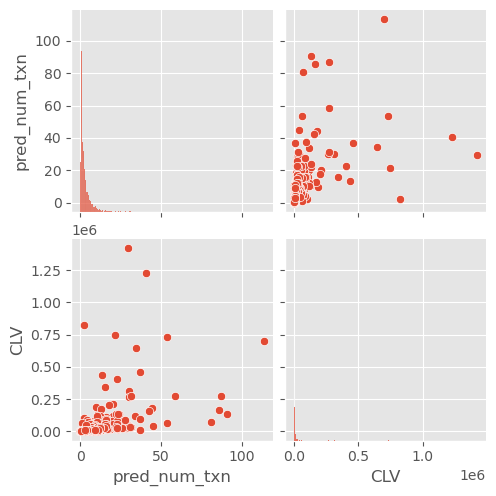

In [108]:
sns.pairplot(data[['pred_num_txn','CLV']])

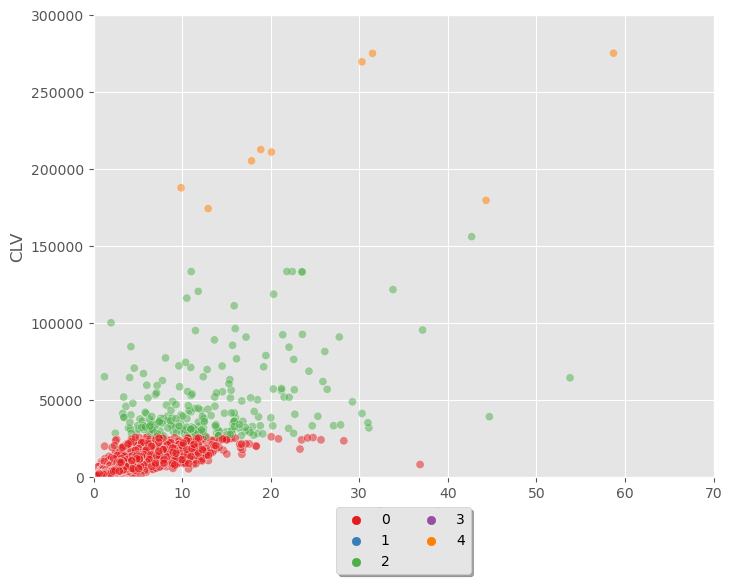

In [109]:

plt.figure(figsize=(8,6))
sns.scatterplot(x = "pred_num_txn", y = "CLV", hue = "Labels", palette = "Set1", data = data, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 2], marker = "x", color = "k", alpha = 0.8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

# set the x-axis limits to 0-10
plt.xlim(0, 70)
plt.ylim(0,300000)

plt.show()


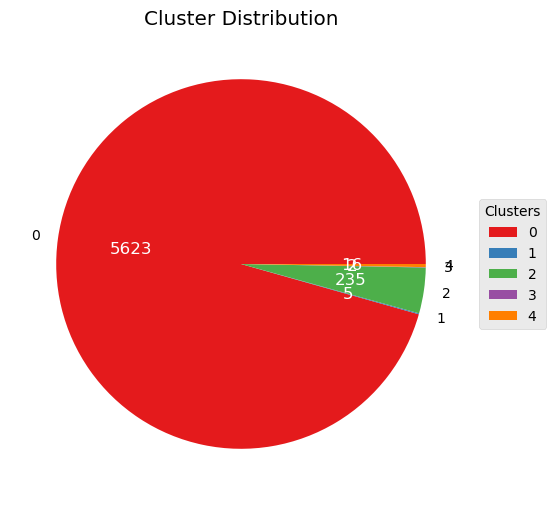

In [110]:
import matplotlib.pyplot as plt

# group the data by cluster label and count the number of customers in each cluster
cluster_sizes = data.groupby('Labels').size()

# create a pie chart of the cluster distribution
fig, ax = plt.subplots(figsize=(8,6))
wedges, texts, autotexts = ax.pie(cluster_sizes, labels=cluster_sizes.index, colors=sns.color_palette("Set1", n_colors=len(cluster_sizes)), autopct='%1.1f%%')
plt.title('Cluster Distribution')

# add legend
ax.legend(wedges, cluster_sizes.index, title='Clusters', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# add distribution numbers
for i, autotext in enumerate(autotexts):
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_text(f'{cluster_sizes[i]}')

plt.show()



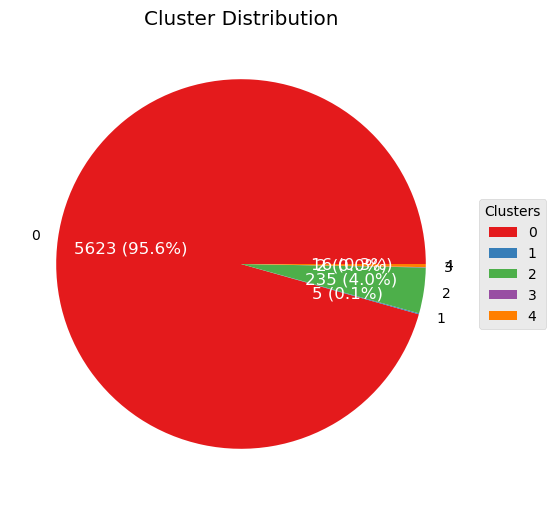

In [111]:
import matplotlib.pyplot as plt

# group the data by cluster label and count the number of customers in each cluster
cluster_sizes = data.groupby('Labels').size()

# calculate percentage of data points in each cluster
cluster_percents = cluster_sizes / len(data) * 100

# create a pie chart of the cluster distribution
fig, ax = plt.subplots(figsize=(8,6))
wedges, texts, autotexts = ax.pie(cluster_sizes, labels=cluster_sizes.index, colors=sns.color_palette("Set1", n_colors=len(cluster_sizes)), autopct='%1.1f%%')
plt.title('Cluster Distribution')

# add legend
ax.legend(wedges, cluster_sizes.index, title='Clusters', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# add distribution numbers and percentages
for i, autotext in enumerate(autotexts):
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_text(f'{cluster_sizes[i]} ({cluster_percents[i]:.1f}%)')

plt.show()



In [112]:
cluster_counts = data['Labels'].value_counts()
cluster_percents = (cluster_counts / len(data)) * 100
cluster_summary = pd.concat([cluster_counts, cluster_percents], axis=1, keys=['Counts', 'Percents'])
print(cluster_summary)


   Counts   Percents
0    5623  95.612991
2     235   3.995919
4      16   0.272063
1       5   0.085020
3       2   0.034008


In [113]:
#plt.figure(figsize=(5,5))
#plt.pie(data["Labels"].value_counts(), labels = data["Labels"].unique(), startangle = 180, explode = [0.0,1.5,1.5,0.0], autopct = "%1.2f%%")
#plt.title("Label Percentage")
#plt.legend()
     

In [114]:
data.to_csv("customer_segmentation_result_final3.csv")